In [1]:
using LCIO
using StatsPlots
using JLD2
using LinearAlgebra
using Distributions
using StatsBase

In [2]:
@load ("Momsskaon") Momsskaon
@load ("TOFsskaon") TOFsskaon
@load ("Momsspion") Momsspion
@load ("TOFsspion") TOFsspion

1-element Array{Symbol,1}:
 :TOFsspion

In [3]:
data = (Momsspion, TOFsspion)
pionfit = fit(Histogram, data, (0:0.05:10, 4:0.05:10))
pionfit = normalize(pionfit::Histogram; mode=:pdf)
data2 = (Momsskaon, TOFsskaon)
kaonfit = fit(Histogram, data2, (0:0.05:10, 4:0.05:10))
kaonfit = normalize(kaonfit::Histogram; mode=:pdf)
plot(pionfit)
savefig("piontest")

In [4]:
function findvalue(data, Momentum, TOF)
    x = searchsortedfirst(data.edges[1], Momentum)
    y = searchsortedfirst(data.edges[2], TOF)
    value = data.weights[x,y]
end

findvalue (generic function with 1 method)

In [5]:
function pionlikelihood(Momentum, TOF)
    L_pi = findvalue(pionfit, Momentum, TOF)
    L_K = findvalue(kaonfit, Momentum, TOF)
    return L_pi/(L_pi + L_K)
end

function kaonlikelihood(Momentum, TOF)
    L_pi = findvalue(pionfit, Momentum, TOF)
    L_K = findvalue(kaonfit, Momentum, TOF)
    return L_K/(L_pi + L_K)
end

kaonlikelihood (generic function with 1 method)

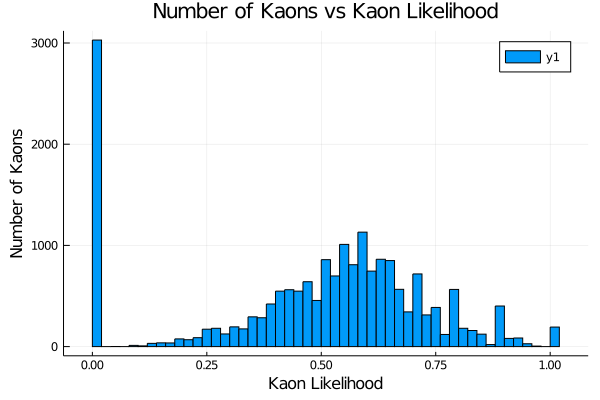

In [6]:
#testing on the kaons
kaon_likelihood = Float64[]
for x in 1:length(Momsskaon)
    if (Momsskaon[x]>=9.95 || TOFsskaon[x]>=9.95) continue end
    push!(kaon_likelihood, kaonlikelihood(Momsskaon[x],TOFsskaon[x]))
end
histogram(kaon_likelihood, title = "Number of Kaons vs Kaon Likelihood", 
    xlabel = "Kaon Likelihood", ylabel = "Number of Kaons")

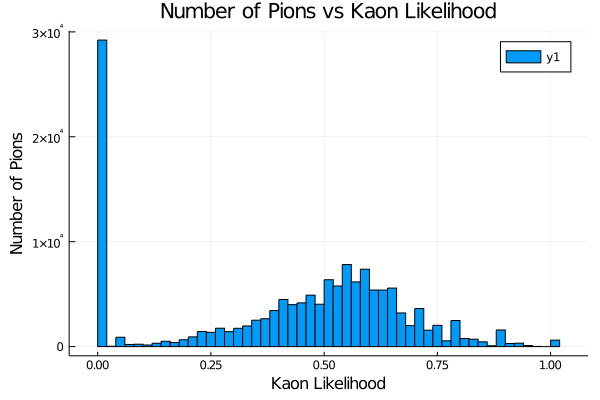

In [7]:
#testing on the pions
pion_likelihood1 = Float64[]
for x in 1:length(Momsspion)
    if (Momsspion[x]>=9.95 || TOFsspion[x]>=9.95) continue end
    push!(pion_likelihood1, kaonlikelihood(Momsspion[x],TOFsspion[x]))
end
histogram(pion_likelihood1, title = "Number of Pions vs Kaon Likelihood", 
    xlabel = "Kaon Likelihood", ylabel = "Number of Pions")

In [8]:
scatter(Momsspion, TOFsspion, title = "Time of Flight (0-10 ns) vs Momentum (from PFOs)", 
    xlabel = "Momentum (GeV/c)", ylabel = "Time of Flight (ns)", 
    label = "pions", ms = 1.0, markerstrokewidth = 0 )
scatter!(Momsskaon, TOFsskaon, label = "kaons", ms = 0.1, markerstrokewidth=0)

savefig("kaons_vs_pions_PFOss")

In [ ]:
scatter(Momsspion, TOFsspion, title = "Time of Flight (0-10 ns) vs Momentum (from PFOs)", 
    xlabel = "Momentum (GeV/c)", ylabel = "Time of Flight (ns)", 
    label = "pions", ms = 1.0, markerstrokewidth = 0 )
savefig("pions")

In [ ]:
scatter(Momsskaon, TOFsskaon, title = "Time of Flight (0-10 ns) vs Momentum (from PFOs)", 
    xlabel = "Momentum (GeV/c)", ylabel = "Time of Flight (ns)", 
    label = "kaons", ms = 1.0, markerstrokewidth = 0 )
savefig("kaons")

In [ ]:
StatsPlots.histogram2d(Momsspion, TOFsspion, bins = (0:0.05:10, 4:0.05:10), title = "Frequency vs Time of Flight and Momentum for pions",
    xlabel = "Momentum (GeV/c)", ylabel = "Time of Flight (ns)", normalize = :pdf)
savefig("pions2D")

In [ ]:
StatsPlots.histogram2d(Momsskaon, TOFsskaon, bins = (0:0.05:10, 4:0.05:10), title = "Frequency vs Time of Flight and Momentum for kaons",
    xlabel = "Momentum (GeV/c)", ylabel = "Time of Flight (ns)", normalize = :pdf)
savefig("kaons2D")